In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Visualizing

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

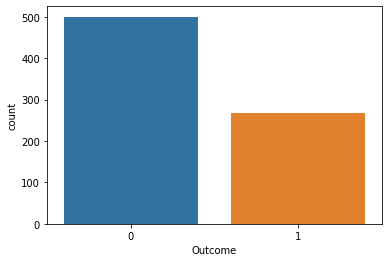

In [6]:
import seaborn as sns
sns.countplot(data['Outcome'],label="Count")

In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

#check outlier and gaussian shape

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6665ed7470>,
      dtype=object)

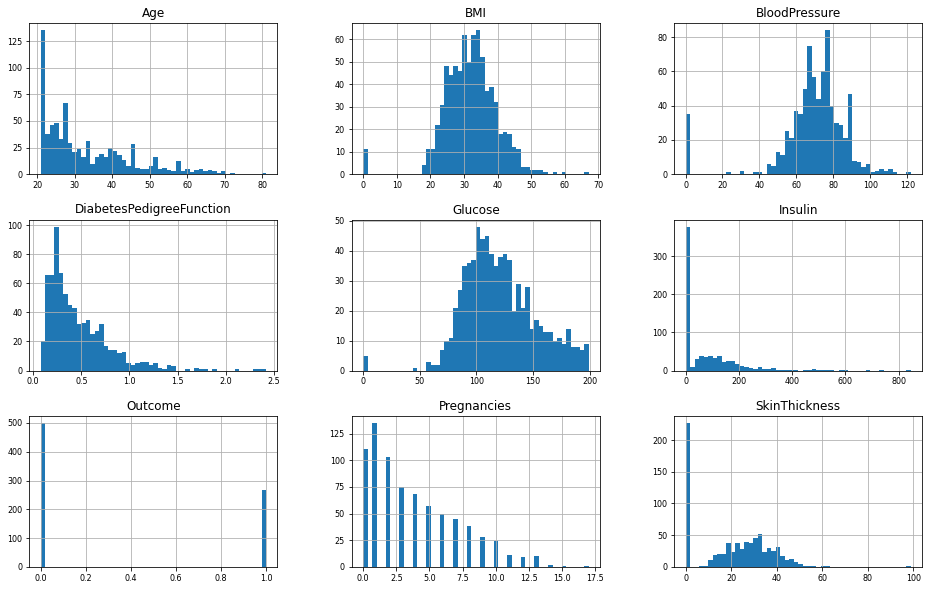

In [9]:
data[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']].hist(figsize=(16,10),bins=50 ,xlabelsize=8, ylabelsize=8)

# Outlier Cleaning

Pregnancies more than 10 is ideally not good so we consider it as outlier.

Body mass index is weight to height ration so weight less than 12 is not range of adults so we consider it as outlier.

bloodpressure lower than 40 is criticly low pressure so we consider it as outlier
Glucose lower than 40 is criticly low pressure so we consider it as outlier.

SkinThickness lower than 60 is criticly low pressure so we consider it as outlier



In [10]:
from scipy import stats

In [11]:
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_data = data[filtered_entries]
print(new_data)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
5              5      116  ...   30        0
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[688 rows x 9 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66663cd828>,
      dtype=object)

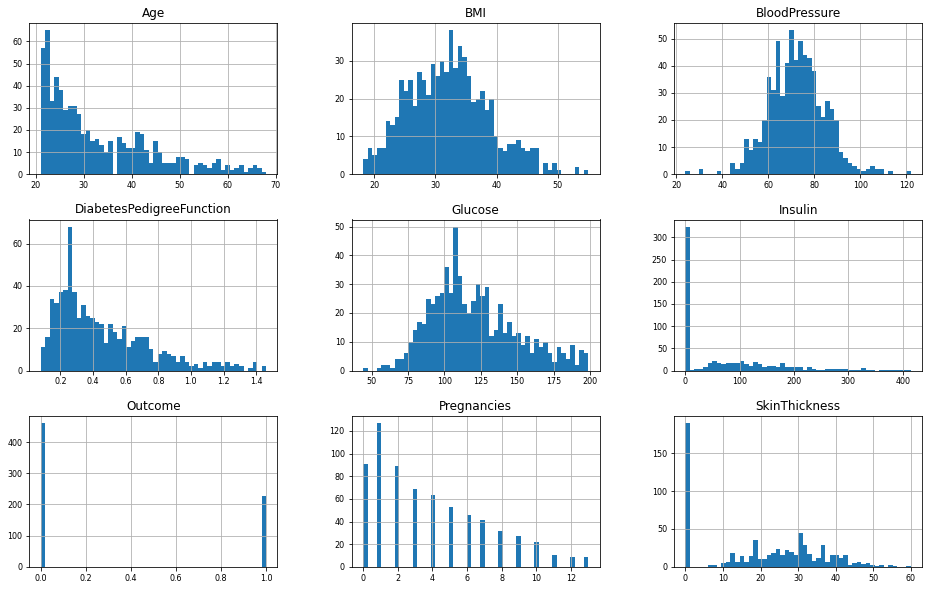

In [12]:
new_data[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']].hist(figsize=(16,10),bins=50 ,xlabelsize=8, ylabelsize=8)

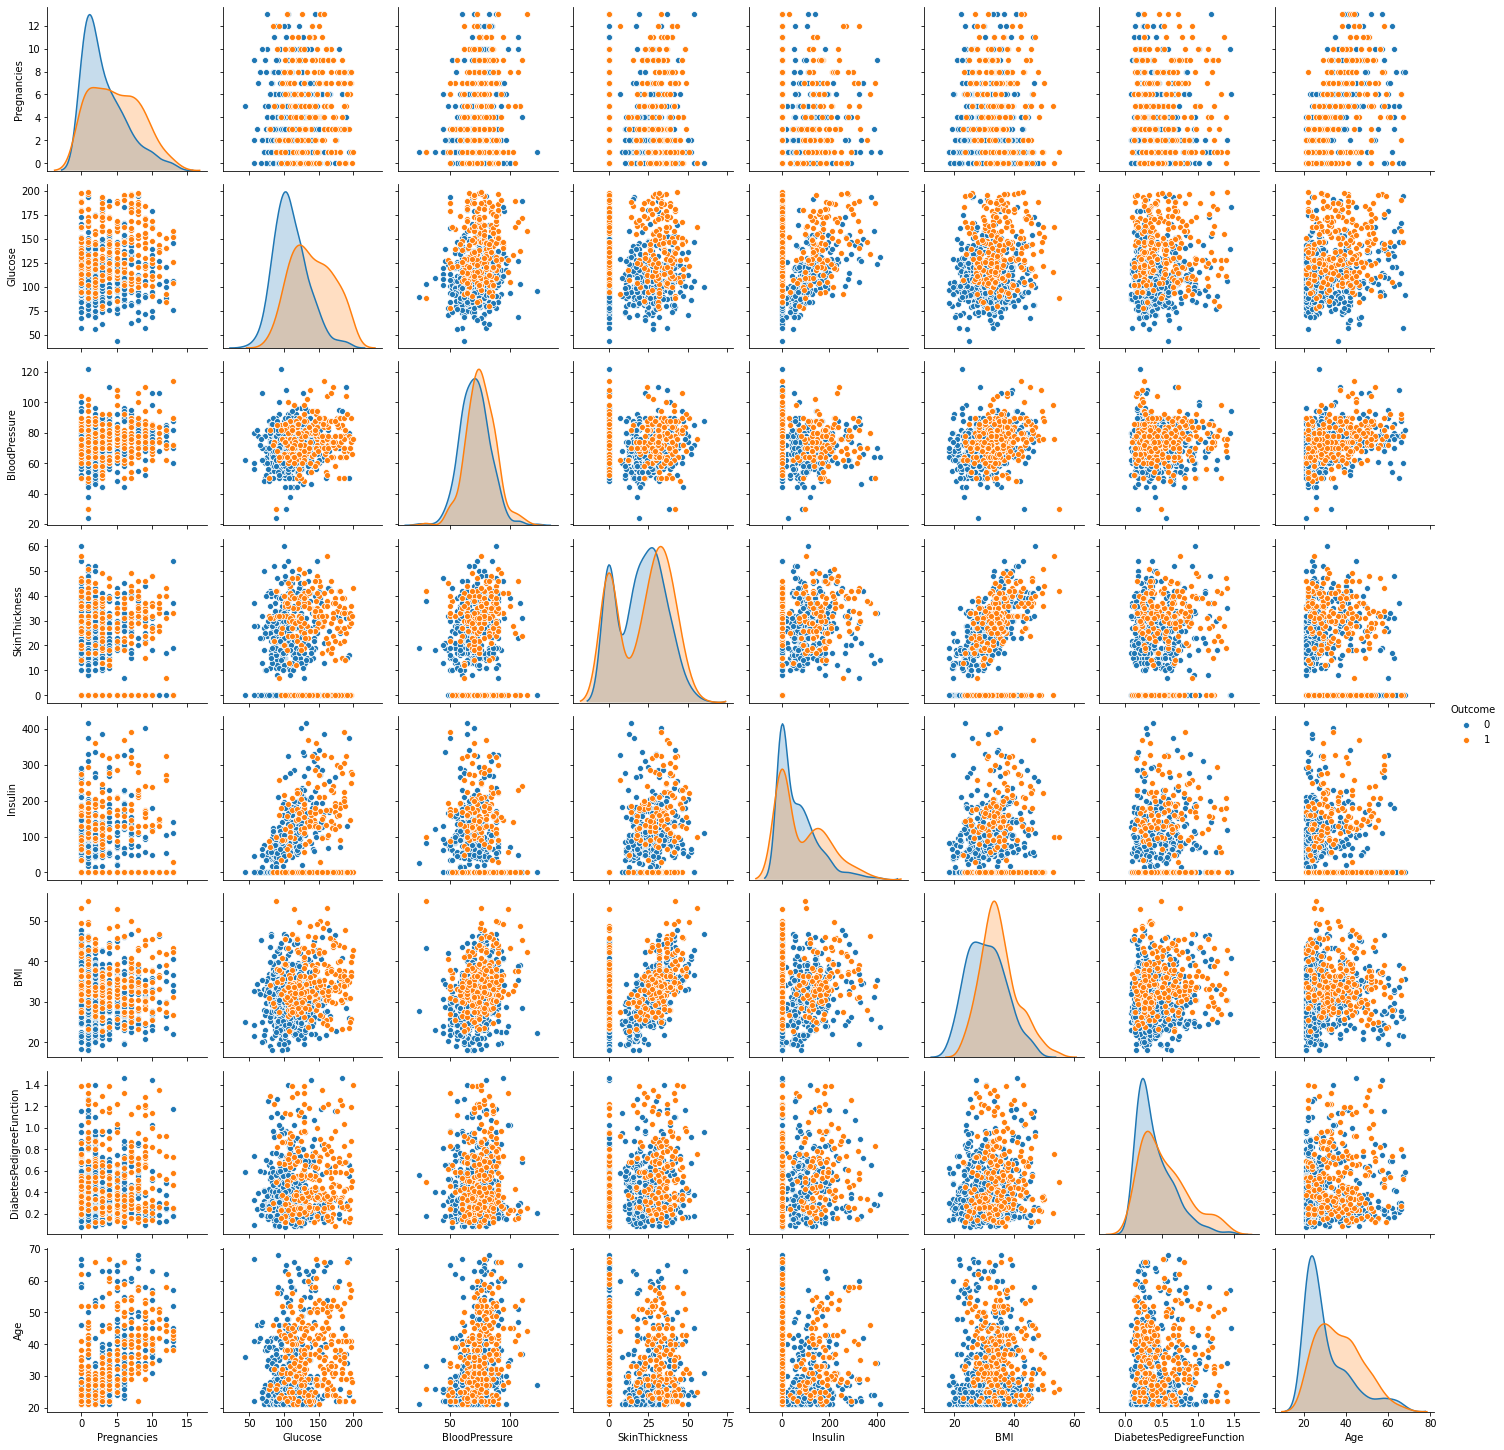

In [13]:
sns.pairplot(new_data, hue="Outcome", diag_kind='kde')

#Correlations

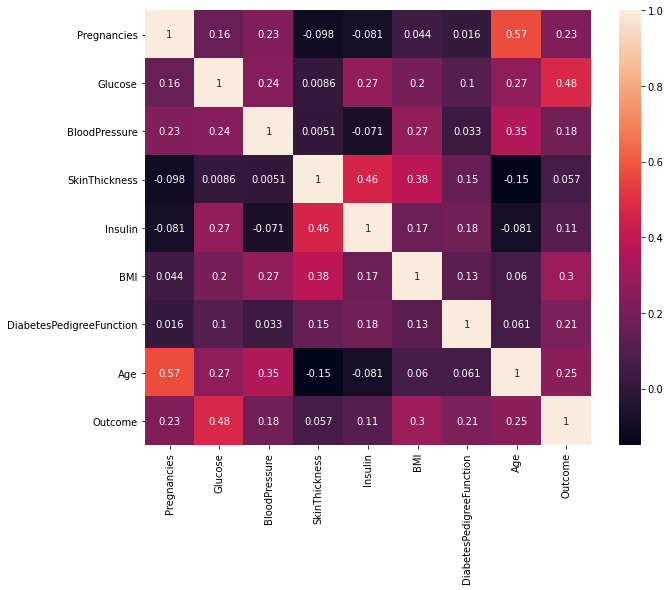

In [15]:
sns.heatmap(new_data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#Evaluating for multiple models


In [18]:
X=new_data.drop(columns=['Outcome','Pregnancies'])
y=new_data['Outcome']

In [17]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [19]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 688, dtype: int64

In [21]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

# Applying SVM 

In [22]:
from sklearn.svm import SVC
svc = SVC( gamma = 'auto')
svc.fit(train_X, train_y)
print("Accuracy on training set: {:.2f}".format(svc.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(svc.score(test_X, test_y)))

Accuracy on training set: 1.00
Accuracy on test set: 0.67


 The model overfits quite substantially, with a perfect score on the training set and only 71% accuracy on the test set.

 SVM requires all the features to vary on a similar scale. 
 
We will need to re-scale our data that all the features are approximately on the same scale:

#decision tree classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=12)
DT.fit(train_X, train_y)

print("Accuracy on training set: {:.2f}".format(DT.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(DT.score(test_X, test_y)))


Accuracy on training set: 1.00
Accuracy on test set: 0.72


#random forest

In [36]:

rf = RandomForestClassifier(n_estimators=420,random_state=72)
model_rf = rf.fit(train_X,train_y)

print("Accuracy on training set: {:.2f}".format(model_rf.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(model_rf.score(test_X, test_y)))



Accuracy on training set: 1.00
Accuracy on test set: 0.75


#gaussian naive bayes

In [25]:
gnb = GaussianNB()
modelgnb = gnb.fit(train_X,train_y)

print("Accuracy on training set: {:.2f}".format(modelgnb.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(modelgnb.score(test_X, test_y)))


Accuracy on training set: 0.79
Accuracy on test set: 0.70


#Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X,train_y)

print("Accuracy on training set: {:.2f}".format(modelgnb.score(train_X, train_y)))
print("Accuracy on test set: {:.2f}".format(modelgnb.score(test_X, test_y)))


Accuracy on training set: 0.79
Accuracy on test set: 0.70


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
y_pred = rf.predict(test_X)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [40]:
test_y

574    0
284    1
361    0
248    0
61     1
      ..
531    0
503    0
396    0
627    0
410    0
Name: Outcome, Length: 138, dtype: int64

In [42]:
y_pred = rf.predict([[148,72,35,0,33.6,0.627,50]])
y_pred

array([1])

In [43]:
y_pred = rf.predict([[131,68,21,166,33.1,0.16,28]])
y_pred

array([0])

# Save Model

In [44]:
from sklearn.externals import joblib
# Save to file in the current working directory
joblib_file = "Diabetes_Pred.pkl"
joblib.dump(rf, joblib_file)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Diabetes_Pred.pkl']

In [47]:
# Load from file
model = joblib.load("Diabetes_Pred.pkl")

In [48]:
result = model.predict([[131,68,21,166,33.1,0.16,28]])
result

array([0])